In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn import tree, metrics, neighbors, preprocessing,\
    decomposition, ensemble, model_selection, pipeline,\
    naive_bayes, neural_network, feature_extraction
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
import time
import copy
import pickle
from gensim import models
import re

## I. Apprentissage supervisé : Feature engineering et Classification

### Chargement des données et préparation

In [2]:
credit_scoring_data = pd.read_csv('credit_scoring.csv', sep=';')

In [3]:
credit_scoring_data.head()

,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Status
0,9.0,1.0,60.0,30.0,0.0,1.0,1.0,73.0,129.0,0.0,0.0,800.0,846.0,1
1,17.0,1.0,60.0,58.0,1.0,1.0,0.0,48.0,131.0,0.0,0.0,1000.0,1658.0,1
2,10.0,0.0,36.0,46.0,0.0,2.0,1.0,90.0,200.0,3000.0,0.0,2000.0,2985.0,0
3,0.0,1.0,60.0,24.0,1.0,1.0,0.0,63.0,182.0,2500.0,0.0,900.0,1325.0,1
4,0.0,1.0,36.0,26.0,1.0,1.0,0.0,46.0,107.0,0.0,0.0,310.0,910.0,1


In [4]:
# Data
X = credit_scoring_data.ix[:, :-1].values
# Target
y = credit_scoring_data.ix[:, -1].values

Dimensions des données : (4375, 13)
Dimensions des targets : (4375,)


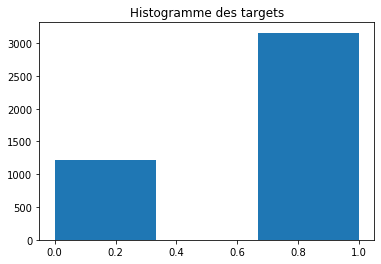

In [5]:
print('Dimensions des données :', X.shape)
print('Dimensions des targets :', y.shape)
plt.hist(y, bins=3)
plt.title('Histogramme des targets')
plt.show()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=1)
print('Dimensions de X_train :', X_train.shape)
print('Dimensions de X_test :', X_test.shape)
print('Dimensions de y_train :', y_train.shape)
print('Dimensions de y_test :', y_test.shape)

Dimensions de X_train : (2187, 13)
Dimensions de X_test : (2188, 13)
Dimensions de y_train : (2187,)
Dimensions de y_test : (2188,)


### Apprentissage et évaluation de modèles

#### Normalisation des données

In [7]:
# StandardScaler
SS = preprocessing.StandardScaler()
SS.fit(X_train)
X_train_ss = SS.transform(X_train)
SS.fit(X_test)
X_test_ss = SS.transform(X_test)

# MinMaxScaler
MM = preprocessing.MinMaxScaler()
MM.fit(X_train)
X_train_mm = MM.transform(X_train)
MM.fit(X_test)
X_test_mm = MM.transform(X_test)

#### Evaluation des modèles

In [8]:
def evaluate(model, X_train, X_test, y_train, y_test, save_to = ''):
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_predict)
    pre = metrics.precision_score(y_test, y_predict)
    rec = metrics.recall_score(y_test, y_predict)
    
    print('Accuracy du modèle :', acc)
    print('Precision du modèle :', pre)
    print('Recall du modèle :', rec)
    print()
    print('Matrice de confusion :')
    print()
    print(pd.DataFrame(
        metrics.confusion_matrix(y_test, y_predict),
        columns=['Prédit 0', 'Prédit 1'],
        index=['Vrai 0', 'Vrai 1']
    ))
    
    if len(save_to) > 0:
        with open(save_to, 'wb') as handle:
            pickle.dump(model, handle)

#### CART

In [9]:
cart = tree.DecisionTreeClassifier(random_state=1)
print('Données non normalisées :\n')
evaluate(cart, X_train, X_test, y_train, y_test)
print('\n\nDonnées normalisées avec StandardScaler :\n')
evaluate(cart, X_train_ss, X_test_ss, y_train, y_test)
print('\n\nDonnées normalisées avec MinMaxScaler :\n')
evaluate(cart, X_train_mm, X_test_mm, y_train, y_test)

Données non normalisées :

Accuracy du modèle : 0.7271480804387569
Precision du modèle : 0.8194174757281554
Recall du modèle : 0.7992424242424242

Matrice de confusion :

        Prédit 0  Prédit 1
Vrai 0       325       279
Vrai 1       318      1266


Données normalisées avec StandardScaler :

Accuracy du modèle : 0.7180073126142597
Precision du modèle : 0.8183015141540487
Recall du modèle : 0.7847222222222222

Matrice de confusion :

        Prédit 0  Prédit 1
Vrai 0       328       276
Vrai 1       341      1243


Données normalisées avec MinMaxScaler :

Accuracy du modèle : 0.7221206581352834
Precision du modèle : 0.8116219667943806
Recall du modèle : 0.80239898989899

Matrice de confusion :

        Prédit 0  Prédit 1
Vrai 0       309       295
Vrai 1       313      1271


#### KNN

In [10]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
print('Données non normalisées :\n')
evaluate(knn, X_train, X_test, y_train, y_test)
print('\n\nDonnées normalisées avec StandardScaler :\n')
evaluate(knn, X_train_ss, X_test_ss, y_train, y_test)
print('\n\nDonnées normalisées avec MinMaxScaler :\n')
evaluate(knn, X_train_mm, X_test_mm, y_train, y_test)

Données non normalisées :

Accuracy du modèle : 0.7248628884826326
Precision du modèle : 0.7709713024282561
Recall du modèle : 0.8819444444444444

Matrice de confusion :

        Prédit 0  Prédit 1
Vrai 0       189       415
Vrai 1       187      1397


Données normalisées avec StandardScaler :

Accuracy du modèle : 0.7495429616087751
Precision du modèle : 0.8087008343265792
Recall du modèle : 0.8566919191919192

Matrice de confusion :

        Prédit 0  Prédit 1
Vrai 0       283       321
Vrai 1       227      1357


Données normalisées avec MinMaxScaler :

Accuracy du modèle : 0.7513711151736746
Precision du modèle : 0.8002309468822171
Recall du modèle : 0.875

Matrice de confusion :

        Prédit 0  Prédit 1
Vrai 0       258       346
Vrai 1       198      1386


### Création de nouvelles variables

In [11]:
pca = decomposition.PCA(n_components=.9)

pca.fit(X_train_ss)
X_train_pca_ss = pca.transform(X_train_ss)
X_train_pca_ss = np.append(X_train_ss[:], X_train_pca_ss[:, :3], axis=1)

pca.fit(X_train_mm)
X_train_pca_mm = pca.transform(X_train_mm)
X_train_pca_mm = np.append(X_train_mm[:], X_train_pca_mm[:, :3], axis=1)

pca.fit(X_test_ss)
X_test_pca_ss = pca.transform(X_test_ss)
X_test_pca_ss = np.append(X_test_ss[:], X_test_pca_ss[:, :3], axis=1)

pca.fit(X_test_mm)
X_test_pca_mm = pca.transform(X_test_mm)
X_test_pca_mm = np.append(X_test_mm[:], X_test_pca_mm[:, :3], axis=1)

#### CART

In [12]:
print('Données normalisées avec StandardScaler + PCA best variables :\n')
evaluate(cart, X_train_pca_ss, X_test_pca_ss, y_train, y_test)
print('\n\nDonnées normalisées avec MinMaxScaler + PCA best variables :\n')
evaluate(cart, X_train_pca_mm, X_test_pca_mm, y_train, y_test)

Données normalisées avec StandardScaler + PCA best variables :

Accuracy du modèle : 0.7239488117001828
Precision du modèle : 0.8279785809906292
Recall du modèle : 0.7809343434343434

Matrice de confusion :

        Prédit 0  Prédit 1
Vrai 0       347       257
Vrai 1       347      1237


Données normalisées avec MinMaxScaler + PCA best variables :

Accuracy du modèle : 0.6992687385740403
Precision du modèle : 0.8050065876152833
Recall du modèle : 0.7714646464646465

Matrice de confusion :

        Prédit 0  Prédit 1
Vrai 0       308       296
Vrai 1       362      1222


#### KNN

In [13]:
print('Données normalisées avec StandardScaler + PCA best variables :\n')
evaluate(knn, X_train_pca_ss, X_test_pca_ss, y_train, y_test)
print('\n\nDonnées normalisées avec MinMaxScaler + PCA best variables :\n')
evaluate(knn, X_train_pca_mm, X_test_pca_mm, y_train, y_test)

Données normalisées avec StandardScaler + PCA best variables :

Accuracy du modèle : 0.7600548446069469
Precision du modèle : 0.8101933216168717
Recall du modèle : 0.8731060606060606

Matrice de confusion :

        Prédit 0  Prédit 1
Vrai 0       280       324
Vrai 1       201      1383


Données normalisées avec MinMaxScaler + PCA best variables :

Accuracy du modèle : 0.7458866544789763
Precision du modèle : 0.7900677200902935
Recall du modèle : 0.8838383838383839

Matrice de confusion :

        Prédit 0  Prédit 1
Vrai 0       232       372
Vrai 1       184      1400


### Sélection de variables

['Income' 'Seniority' 'pca_2' 'pca_3' 'Price' 'pca_1' 'Amount' 'Age'
 'Records' 'Assets' 'Expenses' 'Job' 'Time' 'Debt' 'Home' 'Marital']


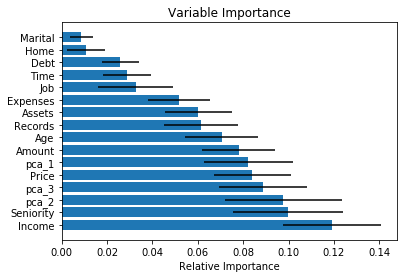

In [14]:
clf = ensemble.RandomForestClassifier(n_estimators=100)
clf.fit(X_train_pca_ss, y_train)
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
sorted_idx = np.argsort(importances)[::-1]
features = np.append(credit_scoring_data.columns[:-1].values, ['pca_1', 'pca_2', 'pca_3'])
print(features[sorted_idx])
padding = np.arange(X_train_pca_ss.size/len(X_train_pca_ss)) + 0.5
plt.barh(padding, importances[sorted_idx],xerr=std[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

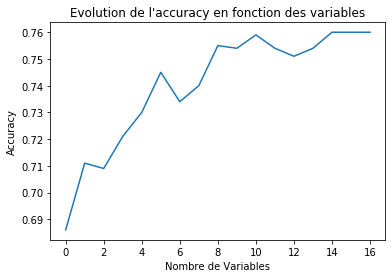

In [15]:
scores = np.zeros(X_train_pca_ss.shape[1] + 1)
for f in np.arange(0, X_train_pca_ss.shape[1] + 1):
    X1_f = X_train_pca_ss[:,sorted_idx[:f+1]]
    X2_f = X_test_pca_ss[:,sorted_idx[:f+1]]
    knn.fit(X1_f,y_train)
    yknn = knn.predict(X2_f)
    scores[f] = np.round(metrics.accuracy_score(y_test, yknn), 3)
plt.plot(scores)
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Evolution de l'accuracy en fonction des variables")
plt.show()

['pca_3' 'Income' 'pca_2' 'Seniority' 'pca_1' 'Price' 'Amount' 'Age'
 'Assets' 'Expenses' 'Records' 'Time' 'Debt' 'Job' 'Marital' 'Home']


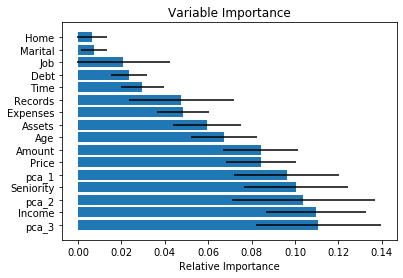

In [16]:
clf = ensemble.RandomForestClassifier(n_estimators=100)
clf.fit(X_train_pca_mm, y_train)
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],axis=0)
sorted_idx = np.argsort(importances)[::-1]
features = np.append(credit_scoring_data.columns[:-1].values, ['pca_1', 'pca_2', 'pca_3'])
print(features[sorted_idx])
padding = np.arange(X_train_pca_mm.size/len(X_train_pca_mm)) + 0.5
plt.barh(padding, importances[sorted_idx],xerr=std[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

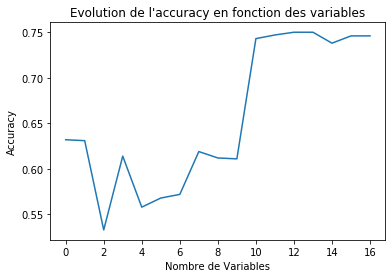

In [17]:
scores = np.zeros(X_train_pca_mm.shape[1] + 1)
for f in np.arange(0, X_train_pca_mm.shape[1] + 1):
    X1_f = X_train_pca_mm[:,sorted_idx[:f+1]]
    X2_f = X_test_pca_mm[:,sorted_idx[:f+1]]
    knn.fit(X1_f,y_train)
    yknn = knn.predict(X2_f)
    scores[f] = np.round(metrics.accuracy_score(y_test, yknn), 3)
plt.plot(scores)
plt.xlabel("Nombre de Variables")
plt.ylabel("Accuracy")
plt.title("Evolution de l'accuracy en fonction des variables")
plt.show()

### Paramétrage des classifieurs

#### CART

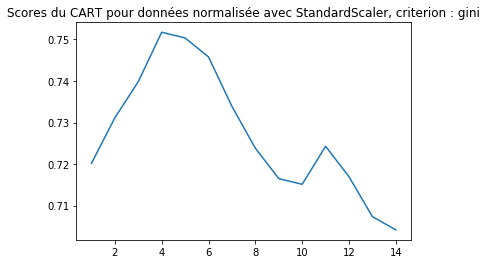

Meilleur score obtenu : 0.7517146776406035  pour max_depth = 4


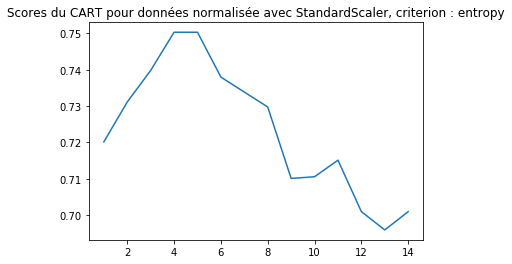

Meilleur score obtenu : 0.7503429355281207  pour max_depth = 4


In [18]:
criterions = ['gini', 'entropy']
depths = list(range(1, 15))
tunable_params = {'criterion': criterions, 'max_depth': depths}
grid = model_selection.GridSearchCV(tree.DecisionTreeClassifier(), param_grid=tunable_params, scoring='accuracy')
grid.fit(X_train_pca_ss, y_train)

for i, criterion in enumerate(criterions):
    plt.plot(depths, grid.cv_results_['mean_test_score'][i*len(depths):(i+1)*len(depths)])
    plt.title('Scores du CART pour données normalisée avec StandardScaler, criterion : ' + criterion)
    plt.show()
    print('Meilleur score obtenu :', max(grid.cv_results_['mean_test_score'][i*len(depths):(i+1)*len(depths)]), 
          ' pour max_depth =', np.argmax(grid.cv_results_['mean_test_score'][i*len(depths):(i+1)*len(depths)]) + 1)

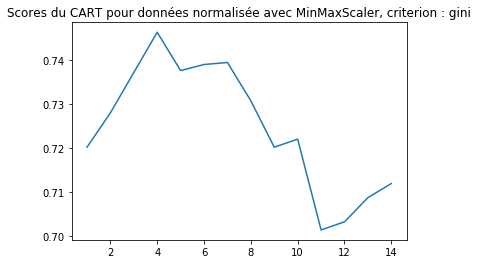

Meilleur score obtenu : 0.7462277091906722  pour max_depth = 4


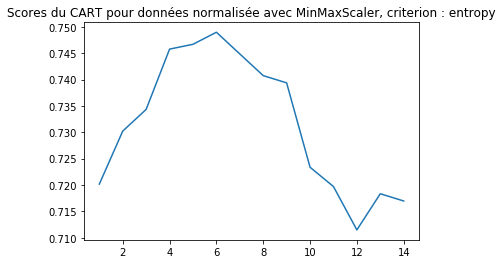

Meilleur score obtenu : 0.7489711934156379  pour max_depth = 6


In [19]:
criterions = ['gini', 'entropy']
depths = list(range(1, 15))
tunable_params = {'criterion': criterions, 'max_depth': depths}
grid = model_selection.GridSearchCV(tree.DecisionTreeClassifier(), param_grid=tunable_params, scoring='accuracy')
grid.fit(X_train_pca_mm, y_train)

for i, criterion in enumerate(criterions):
    plt.plot(depths, grid.cv_results_['mean_test_score'][i*len(depths):(i+1)*len(depths)])
    plt.title('Scores du CART pour données normalisée avec MinMaxScaler, criterion : ' + criterion)
    plt.show()
    print('Meilleur score obtenu :', max(grid.cv_results_['mean_test_score'][i*len(depths):(i+1)*len(depths)]), 
          ' pour max_depth =', np.argmax(grid.cv_results_['mean_test_score'][i*len(depths):(i+1)*len(depths)]) + 1)

#### KNN

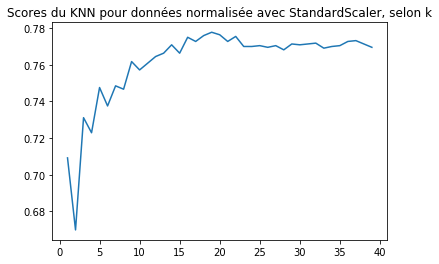

Meilleur score obtenu : 0.7777777777777778  pour k = 19


In [20]:
k_range = list(range(1, 40))
tunable_params = {'n_neighbors': k_range}
grid = model_selection.GridSearchCV(neighbors.KNeighborsClassifier(), param_grid=tunable_params, scoring='accuracy')
grid.fit(X_train_pca_ss, y_train)
plt.plot(k_range, grid.cv_results_['mean_test_score'])
plt.title('Scores du KNN pour données normalisée avec StandardScaler, selon k')
plt.show()
print('Meilleur score obtenu :', max(grid.cv_results_['mean_test_score']), 
      ' pour k =', np.argmax(grid.cv_results_['mean_test_score']) + 1)

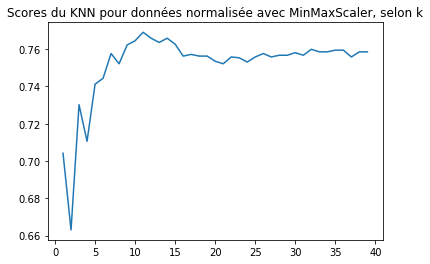

Meilleur score obtenu : 0.7690900777320531  pour k = 11


In [21]:
k_range = list(range(1, 40))
tunable_params = {'n_neighbors': k_range}
grid = model_selection.GridSearchCV(neighbors.KNeighborsClassifier(), param_grid=tunable_params, scoring='accuracy')
grid.fit(X_train_pca_mm, y_train)
plt.plot(k_range, grid.cv_results_['mean_test_score'])
plt.title('Scores du KNN pour données normalisée avec MinMaxScaler, selon k')
plt.show()
print('Meilleur score obtenu :', max(grid.cv_results_['mean_test_score']), 
      ' pour k =', np.argmax(grid.cv_results_['mean_test_score']) + 1)

### Création d’un pipeline

#### On ne conserve que le StandardScaler comme technique de normalisation puisqu'elle donne globalement des meilleurs résultats dans notre cas
#### On sauvegarde les deux modèles entrainés sur les données de training, on pourra ensuite les charger à nouveau.

In [22]:
pipe = pipeline.Pipeline(steps=[
    ('scaler', preprocessing.StandardScaler()),
    ('pca', decomposition.PCA(n_components=.9)),
    ('model', neighbors.KNeighborsClassifier(n_neighbors=19)),
])

# Saves the model trained on X_train and y_train
evaluate(pipe, X_train, X_test, y_train, y_test, save_to='knn_k19.pickle')

print('\n')

pipe = pipeline.Pipeline(steps=[
    ('scaler', preprocessing.StandardScaler()),
    ('pca', decomposition.PCA(n_components=.9)),
    ('model', tree.DecisionTreeClassifier(random_state=1)),
])

# Saves the model trained on X_train and y_train
evaluate(pipe, X_train, X_test, y_train, y_test, save_to='scart.pickle')

Accuracy du modèle : 0.7728519195612431
Precision du modèle : 0.810394060536836
Recall du modèle : 0.8958333333333334

Matrice de confusion :

        Prédit 0  Prédit 1
Vrai 0       272       332
Vrai 1       165      1419


Accuracy du modèle : 0.6937842778793418
Precision du modèle : 0.7967532467532468
Recall du modèle : 0.7746212121212122

Matrice de confusion :

        Prédit 0  Prédit 1
Vrai 0       291       313
Vrai 1       357      1227


#### Chargement du modèle précédemment entrainé et prédictions sur les mêmes données qu'au dessus.
#### On obtient bien les mêmes résultats

In [23]:
with open('knn_k19.pickle', 'rb') as handle:
    model = pickle.load(handle)
    y_predict = model.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_predict)
    pre = metrics.precision_score(y_test, y_predict)
    rec = metrics.recall_score(y_test, y_predict)
    
    print('Accuracy du modèle :', acc)
    print('Precision du modèle :', pre)
    print('Recall du modèle :', rec)
    print()
    print('Matrice de confusion :')
    print()
    print(pd.DataFrame(
        metrics.confusion_matrix(y_test, y_predict),
        columns=['Prédit 0', 'Prédit 1'],
        index=['Vrai 0', 'Vrai 1']
    ))

Accuracy du modèle : 0.7728519195612431
Precision du modèle : 0.810394060536836
Recall du modèle : 0.8958333333333334

Matrice de confusion :

        Prédit 0  Prédit 1
Vrai 0       272       332
Vrai 1       165      1419


### Comparaison de plusieurs algorithmes d’apprentissage

In [24]:
def run_classifiers(clfs, X, y):
    for i in clfs:
        clf = clfs[i]
        print('-----------------')
        print(i)
        start = time.time()
        cv_acc = model_selection.cross_val_score(clf, copy.deepcopy(X), copy.deepcopy(y), cv=10)
        end = time.time()
        print("Accuracy: {1:.3f} +/- {2:.3f}".format(i, np.mean(cv_acc), np.std(cv_acc)))
        cv_acc = model_selection.cross_val_score(clf, copy.deepcopy(X), copy.deepcopy(y), cv=5, scoring='roc_auc')
        print("AUC: {1:.3f} +/- {2:.3f}".format(i, np.mean(cv_acc), np.std(cv_acc)))
        # Plus important que les oui soient vrais donc on choisit de conserver la precision et non le rappel
        cv_acc = model_selection.cross_val_score(clf, copy.deepcopy(X), copy.deepcopy(y), cv=5, scoring='precision')
        print("Precision: {1:.3f} +/- {2:.3f}".format(i, np.mean(cv_acc), np.std(cv_acc)))
        print("Exec time for a single run: {1:.3f}s".format(i, (end - start) / 10))

In [25]:
clfs = {
    'Bayes': naive_bayes.GaussianNB(),
    'RF': ensemble.RandomForestClassifier(n_estimators=50, random_state=1),
    'KNN': neighbors.KNeighborsClassifier(n_neighbors=19),
    'CART': tree.DecisionTreeClassifier(random_state=1),
    'AdaBoost': ensemble.AdaBoostClassifier(tree.DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=50),
    'MLP': neural_network.MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(20, 10), random_state=1),
    'Bagging': ensemble.BaggingClassifier(n_estimators=50, random_state=1)
}

run_classifiers(clfs, X_train_pca_ss, y_train)

-----------------
Bayes
Accuracy: 0.737 +/- 0.019
AUC: 0.777 +/- 0.016
Precision: 0.817 +/- 0.015
Exec time for a single run: 0.004s
-----------------
RF
Accuracy: 0.764 +/- 0.023
AUC: 0.815 +/- 0.020
Precision: 0.810 +/- 0.014
Exec time for a single run: 0.342s
-----------------
KNN
Accuracy: 0.764 +/- 0.023
AUC: 0.788 +/- 0.027
Precision: 0.799 +/- 0.019
Exec time for a single run: 0.053s
-----------------
CART
Accuracy: 0.696 +/- 0.030
AUC: 0.626 +/- 0.002
Precision: 0.791 +/- 0.002
Exec time for a single run: 0.032s
-----------------
AdaBoost
Accuracy: 0.780 +/- 0.023
AUC: 0.826 +/- 0.024
Precision: 0.817 +/- 0.016
Exec time for a single run: 0.254s
-----------------
MLP
Accuracy: 0.725 +/- 0.022
AUC: 0.765 +/- 0.023
Precision: 0.810 +/- 0.012
Exec time for a single run: 0.727s
-----------------
Bagging
Accuracy: 0.760 +/- 0.024
AUC: 0.801 +/- 0.019
Precision: 0.810 +/- 0.012
Exec time for a single run: 0.971s


#### Nous avons préféré conserver la precision plutôt que le rappel, il nous semble plus intéressant que la majorité des vrais prédits soient positifs.
#### On s'apperçoit que dans notre cas le classifier le plus performant est l'AdaBoost avec la meilleure accuracy, meilleure AUC et meilleure precision.

## II. Apprentissage supervisé : Données hétérogènes

### Traitement en ne considérant qe les valeurs numériques

In [26]:
credit_data = pd.read_table('credit.data', header=None)
# Replace ? with nan
credit_data = credit_data.replace('?', np.nan)
# Replace + and - with 1 and 0
credit_data = credit_data.replace('+', 1)
credit_data = credit_data.replace('-', 0)
# Drop nan
credit_data = credit_data.dropna()
credit_data = credit_data._get_numeric_data()

In [27]:
credit_data.head()

,2,7,10,14,15
0,0.000,1.25,1,0,1
1,4.460,3.04,6,560,1
2,0.500,1.50,0,824,1
3,1.540,3.75,5,3,1
4,5.625,1.71,0,0,1


In [28]:
# Data
X = credit_data.ix[:, :14].values
# Target
y = credit_data.ix[:, 15].values

Dimensions des données : (653, 4)
Dimensions des targets : (653,)


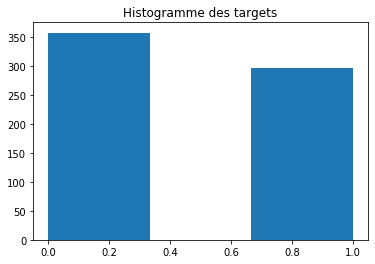

In [29]:
print('Dimensions des données :', X.shape)
print('Dimensions des targets :', y.shape)
plt.hist(y, bins=3)
plt.title('Histogramme des targets')
plt.show()

In [30]:
print('Dimensions de X :', X.shape)
print('Dimensions de y :', y.shape)

Dimensions de X : (653, 4)
Dimensions de y : (653,)


In [31]:
# StandardScaler
SS = preprocessing.StandardScaler()
SS.fit(X)
X_ss = SS.transform(X)

# PCA
pca = decomposition.PCA(n_components=.9)

pca.fit(X_ss)
X_pca_ss = pca.transform(X_ss)
X_pca_ss = np.append(X_ss[:], X_pca_ss[:, :3], axis=1)

In [32]:
run_classifiers(clfs, X_pca_ss, y)

-----------------
Bayes
Accuracy: 0.720 +/- 0.063
AUC: 0.805 +/- 0.054
Precision: 0.845 +/- 0.101
Exec time for a single run: 0.003s
-----------------
RF
Accuracy: 0.731 +/- 0.069
AUC: 0.792 +/- 0.058
Precision: 0.716 +/- 0.067
Exec time for a single run: 0.131s
-----------------
KNN
Accuracy: 0.753 +/- 0.076
AUC: 0.808 +/- 0.066
Precision: 0.859 +/- 0.086
Exec time for a single run: 0.009s
-----------------
CART
Accuracy: 0.698 +/- 0.053
AUC: 0.696 +/- 0.069
Precision: 0.667 +/- 0.078
Exec time for a single run: 0.007s
-----------------
AdaBoost
Accuracy: 0.778 +/- 0.067
AUC: 0.830 +/- 0.065
Precision: 0.796 +/- 0.056
Exec time for a single run: 0.136s
-----------------
MLP
Accuracy: 0.737 +/- 0.054
AUC: 0.779 +/- 0.061
Precision: 0.718 +/- 0.054
Exec time for a single run: 0.296s
-----------------
Bagging
Accuracy: 0.756 +/- 0.075
AUC: 0.791 +/- 0.062
Precision: 0.741 +/- 0.063
Exec time for a single run: 0.219s


### Traitement en considérant toutes les données

In [33]:
credit_data = pd.read_table('credit.data', header=None)
# Replace + and - with 1 and 0
credit_data = credit_data.replace('+', 1)
credit_data = credit_data.replace('-', 0)

# Data
X = credit_data.ix[:, :14].values
# Target
y = credit_data.ix[:, 15].values

# Define columns
col_num = [1, 2, 7, 10, 13, 14]
col_cat = [0, 3, 4, 5, 6, 8, 9, 11, 12]

In [34]:
credit_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,1


In [35]:
# Handle categorial columns
X_cat = np.copy(X)
X_cat = X_cat.take(col_cat, axis=1)
for col_id in range(len(col_cat)):
    unique_val, val_idx = np.unique(X_cat[:, col_id], return_inverse=True)
    X_cat[:, col_id] = val_idx
imp_cat = preprocessing.Imputer(missing_values=0, strategy='most_frequent')
X_cat[:, range(5)] = imp_cat.fit_transform(X_cat[:, range(5)])

# Handle numeric columns
X_num = np.copy(X[:, col_num])
X_num[X_num == '?'] = np.nan
X_num = X_num.astype(float)
imp_num = preprocessing.Imputer(missing_values=np.nan, strategy='mean')
X_num = imp_num.fit_transform(X_num)

# StandardScaler
SS = preprocessing.StandardScaler()
SS.fit(X_num)
X_num_ss = SS.transform(X_num)

# PCA
pca = decomposition.PCA(n_components=.9)

pca.fit(X_num_ss)
X_num_pca_ss = pca.transform(X_num_ss)
X_num_pca_ss = np.append(X_num_ss[:], X_num_pca_ss[:, :3], axis=1)

C:\Users\Thomas Ranvier\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Thomas Ranvier\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [36]:
# Convert categorial values to binary
X_cat_bin = preprocessing.OneHotEncoder().fit_transform(X_cat).toarray()

In [37]:
# Construct back the whole dataset set and run all classifiers
X_total = np.concatenate((X_cat, X_num_pca_ss), axis=1)

run_classifiers(clfs, X_total, y)

-----------------
Bayes
Accuracy: 0.768 +/- 0.071
AUC: 0.877 +/- 0.065
Precision: 0.830 +/- 0.112
Exec time for a single run: 0.007s
-----------------
RF
Accuracy: 0.846 +/- 0.128
AUC: 0.914 +/- 0.073
Precision: 0.843 +/- 0.155
Exec time for a single run: 0.135s
-----------------
KNN
Accuracy: 0.773 +/- 0.077
AUC: 0.844 +/- 0.066
Precision: 0.808 +/- 0.121
Exec time for a single run: 0.013s
-----------------
CART
Accuracy: 0.782 +/- 0.102
AUC: 0.792 +/- 0.084
Precision: 0.772 +/- 0.138
Exec time for a single run: 0.011s
-----------------
AdaBoost
Accuracy: 0.838 +/- 0.147
AUC: 0.915 +/- 0.078
Precision: 0.836 +/- 0.175
Exec time for a single run: 0.193s
-----------------
MLP
Accuracy: 0.827 +/- 0.111
AUC: 0.899 +/- 0.066
Precision: 0.856 +/- 0.149
Exec time for a single run: 0.310s
-----------------
Bagging
Accuracy: 0.839 +/- 0.132
AUC: 0.903 +/- 0.084
Precision: 0.817 +/- 0.148
Exec time for a single run: 0.307s


In [38]:
# Test with binarized cat columns
X_total_bin = np.concatenate((X_cat_bin, X_num_pca_ss), axis=1)

run_classifiers(clfs, X_total_bin, y)

-----------------
Bayes
Accuracy: 0.724 +/- 0.047
AUC: 0.863 +/- 0.052
Precision: 0.854 +/- 0.099
Exec time for a single run: 0.003s
-----------------
RF
Accuracy: 0.849 +/- 0.137
AUC: 0.908 +/- 0.079
Precision: 0.847 +/- 0.163
Exec time for a single run: 0.144s
-----------------
KNN
Accuracy: 0.839 +/- 0.102
AUC: 0.894 +/- 0.076
Precision: 0.863 +/- 0.136
Exec time for a single run: 0.017s
-----------------
CART
Accuracy: 0.802 +/- 0.091
AUC: 0.788 +/- 0.090
Precision: 0.776 +/- 0.152
Exec time for a single run: 0.011s
-----------------
AdaBoost
Accuracy: 0.836 +/- 0.156
AUC: 0.914 +/- 0.078
Precision: 0.838 +/- 0.180
Exec time for a single run: 0.170s
-----------------
MLP
Accuracy: 0.791 +/- 0.124
AUC: 0.844 +/- 0.093
Precision: 0.801 +/- 0.141
Exec time for a single run: 0.272s
-----------------
Bagging
Accuracy: 0.841 +/- 0.141
AUC: 0.906 +/- 0.086
Precision: 0.831 +/- 0.153
Exec time for a single run: 0.280s


#### On observe des résultats bien meilleurs lorsque l'on considère le dataset dans son ensemble. 
#### On peut également constater que les résultats sont globalement légèrement suppérieurs avec les données catégorielles binarisées.
#### Le classifier semblant le plus performant avec ce dataset est la random forest

## III. Apprentissage supervisé sur des données textuelles : Feature engineering et Classification

In [39]:
sms_data = pd.read_table('SMSSpamCollection.data', header=None)

In [40]:
sms_data.head()

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Vectorizer

In [41]:
# Create the vectorizer
vectorizer = CountVectorizer(stop_words='english')

In [42]:
# Fit it to our texts
X_cv = vectorizer.fit_transform(sms_data.ix[:, 1])
print('Matrice de co-occurences :')
X_cv

Matrice de co-occurences :


<5572x8444 sparse matrix of type '<class 'numpy.int64'>'
	with 43578 stored elements in Compressed Sparse Row format>

#### Il n'est apparemment pas toujours recommandé de supprimer les stop words mais nous les supprimons ici avec l'option stop_words='english'.
#### Seuls les mots de plus de 2 caractères sont conservés.

In [43]:
# Extract targets in y
y = sms_data.ix[:, 0].values
y = np.where(y=='ham', 1, y)
y = np.where(y=='spam', 0, y)
y = y.astype(float)

In [44]:
clfs_light = {
    'Bayes': naive_bayes.GaussianNB(),
    'MLP': neural_network.MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(20, 10), random_state=1),
}

run_classifiers(clfs_light, X_cv.toarray().astype(float), y)

-----------------
Bayes
Accuracy: 0.884 +/- 0.009
AUC: 0.898 +/- 0.011
Precision: 0.985 +/- 0.003
Exec time for a single run: 2.488s
-----------------
MLP
Accuracy: 0.983 +/- 0.004
AUC: 0.988 +/- 0.004
Precision: 0.985 +/- 0.001
Exec time for a single run: 1.788s


#### On remarque que les résultats sont excellents, notamment pour le MLP, mais le temps d'exécution est extrémement long, nous avons dû créer une liste de classifiers très allégée pour éviter de devoir attendre trop longtemps.

#### Il est important de noter que l'exécution est longue à cause 

### Tf-idf

In [45]:
# Create the td-idf
vectorizer = TfidfVectorizer(stop_words='english')

In [46]:
# Fit to the data
X_tf = vectorizer.fit_transform(sms_data.ix[:, 1])
X_tf

<5572x8444 sparse matrix of type '<class 'numpy.float64'>'
	with 43578 stored elements in Compressed Sparse Row format>

In [47]:
run_classifiers(clfs_light, X_tf.toarray().astype(float), y)

-----------------
Bayes
Accuracy: 0.881 +/- 0.010
AUC: 0.883 +/- 0.008
Precision: 0.980 +/- 0.002
Exec time for a single run: 1.095s
-----------------
MLP
Accuracy: 0.925 +/- 0.059
AUC: 0.984 +/- 0.006
Precision: 0.915 +/- 0.060
Exec time for a single run: 1.732s


#### Nous utilisons ici le tfidf vectorizer qui combine l'étape précédente avec une transformation par tfidf.

#### Les résultats obtenus sont moins bon que précédemment et le temps d'exécution est le même car la matrice présente les mêmes dimensions que précédemment.

In [48]:
transformer = decomposition.TruncatedSVD(n_components=100)

In [49]:
# Fit to the data
X_t = transformer.fit_transform(X_tf)
X_t.shape

(5572, 100)

In [50]:
run_classifiers(clfs, X_t, y)

-----------------
Bayes
Accuracy: 0.697 +/- 0.015
AUC: 0.912 +/- 0.017
Precision: 0.978 +/- 0.005
Exec time for a single run: 0.013s
-----------------
RF
Accuracy: 0.975 +/- 0.005
AUC: 0.976 +/- 0.010
Precision: 0.973 +/- 0.004
Exec time for a single run: 1.092s
-----------------
KNN
Accuracy: 0.959 +/- 0.006
AUC: 0.968 +/- 0.006
Precision: 0.958 +/- 0.005
Exec time for a single run: 0.420s
-----------------
CART
Accuracy: 0.952 +/- 0.007
AUC: 0.895 +/- 0.022
Precision: 0.973 +/- 0.007
Exec time for a single run: 0.413s
-----------------
AdaBoost
Accuracy: 0.965 +/- 0.006
AUC: 0.978 +/- 0.010
Precision: 0.974 +/- 0.006
Exec time for a single run: 2.252s
-----------------
MLP
Accuracy: 0.950 +/- 0.043
AUC: 0.984 +/- 0.005
Precision: 0.984 +/- 0.005
Exec time for a single run: 0.286s
-----------------
Bagging
Accuracy: 0.973 +/- 0.007
AUC: 0.972 +/- 0.010
Precision: 0.974 +/- 0.005
Exec time for a single run: 11.829s


#### Le SVD permet d'obtenir une matrice de dimensions plus basses, on peut donc ainsi faire tourner la liste complète des classifiers.
#### On peut constater que les résultats sont globalement bons et meilleurs qu'avant le SVD

### Création d'un pipeline

In [51]:
pipe = pipeline.Pipeline(steps=[
    ('vectorizer+tfidf', TfidfVectorizer(stop_words='english')),
    ('svd', decomposition.TruncatedSVD(n_components=100)),
    ('model', ensemble.RandomForestClassifier(n_estimators=50, random_state=1))
])

### Application à un autre jeu de données

In [52]:
yelp_data = pd.read_csv('yelp-text-by-stars.csv', delimiter=';', encoding = 'ISO-8859-1')

In [53]:
print(yelp_data.shape)
yelp_data.head()

(47371, 2)


,Stars,Text
0,1,Boarded my English Mastiff here over New Year'...
1,1,Another case of the Emperor's New Clothes. So...
2,1,Came on Valentine's Day night having pre-bough...
3,1,2Nd time eating here today.1st time was great ...
4,1,Allegiant is a disaster. Their fares are chea...


In [54]:
# Change 0 to 3 to 0
yelp_data = yelp_data.replace([0, 1, 2, 3], 0)
# Change 4 and 5 to 1
yelp_data = yelp_data.replace([4, 5], 1)

In [55]:
X = yelp_data.ix[:, 1].values

# Extract targets in y
y = yelp_data.ix[:, 0].values
print(y)

[0 0 0 ... 1 1 1]


In [56]:
clfs = {'pipe': pipe}

run_classifiers(clfs, X, y)

-----------------
pipe
Accuracy: 0.796 +/- 0.048
AUC: 0.861 +/- 0.037
Precision: 0.801 +/- 0.068
Exec time for a single run: 23.876s


#### On peut constater que pour l'ensemble du dataset yelp, qui est assez imposant nous obtenons une accuracy d'environ 80%, de même pour la précision.
#### Le SVD du pipe est de 100 composant et nous supprimons les mots clés stop, comme précédemment.
#### Le temps d'exécution indiqué est l'estimation du temps d'une seule exécution de l'algorithme.

## IV. Application d'une approche Word2Vec

2 types, Skip-gram et CBOW : Continuous Bag Of Words.

### Skip-gram
* Input: Target word
* Outputs: Surrounding words

### CBOW
Similar to Skip-gram but input and outputs are swapped

It is claimed that Skip-gram tends to do better in rare words.
Nevertheless, the performance of Skip-gram and CBOW are generally similar.

#### Première étape : Adapter les données pour le Word2Vec model

In [57]:
cleaned_X = []
for text in X:
    # Application d'une regex qui ne grade que les lettres et chiffres, on passe tous les mots en minuscules
    cleaned_X.append(re.sub(r'[^a-z0-9]+', ' ', text.lower()).split())

print(cleaned_X[0][:10])

['boarded', 'my', 'english', 'mastiff', 'here', 'over', 'new', 'year', 's', 'they']


In [58]:
model_w2v = models.Word2Vec(sentences=cleaned_X, size=100, window=5, min_count=5, workers=4, sg=0)

#### La commande suivante permet ensuite de visualiser les mots les plus similaire au mot choisit

In [59]:
model_w2v.wv.most_similar('are')

[('were', 0.6731177568435669),
 ('re', 0.666783332824707),
 ('aren', 0.5655664205551147),
 ('arent', 0.49904924631118774),
 ('serve', 0.45695966482162476),
 ('werent', 0.42885375022888184),
 ('weren', 0.4276278614997864),
 ('seem', 0.4195653796195984),
 ('is', 0.41939783096313477),
 ('produce', 0.387501060962677)]

### FastText

Permet de ne pas seulement analyser les mots entiers, mais par groupes de n lettres.

Le principal intérêt est de permettre de trouver des mots similaires à des mots ne faisant pas partie du dataset de base !

Exemple : 
* n = 4
* word = 'tomate'
* ngrams = ['toma','omat','mate']

In [60]:
model_ft = models.FastText(cleaned_X, size=100, window=5, min_count=5, workers=4,sg=1)

In [61]:
# Find a word not in dataset

word_not_in_dataset = 'anomalies'

for sentence in cleaned_X:
    if word_not_in_dataset in sentence:
        print('Word does exist in dataset!')
        break
else:
    print('Word does NOT exist in dataset!')

Word does NOT exist in dataset!


In [62]:
model_ft.wv.most_similar(word_not_in_dataset)

[('anomaly', 0.7504565715789795),
 ('enemy', 0.6721968650817871),
 ('intimacy', 0.6696910262107849),
 ('bjs', 0.6681037545204163),
 ('kj', 0.6480093598365784),
 ('izakaya', 0.6450121998786926),
 ('caliendo', 0.6380575895309448),
 ('afterthought', 0.6350116729736328),
 ('interstate', 0.6337161064147949),
 ('habitat', 0.6301324367523193)]